<a href="https://colab.research.google.com/github/gskumlehn/autism-info-llm-comparison/blob/main/network_analysis_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
!rm -r /content/autism-info-llm-comparison

In [50]:
!git clone https://github.com/gskumlehn/autism-info-llm-comparison.git

Cloning into 'autism-info-llm-comparison'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 161 (delta 29), reused 17 (delta 17), pack-reused 117 (from 1)
Receiving objects: 100% (161/161), 9.71 MiB | 15.56 MiB/s, done.
Resolving deltas: 100% (65/65), done.


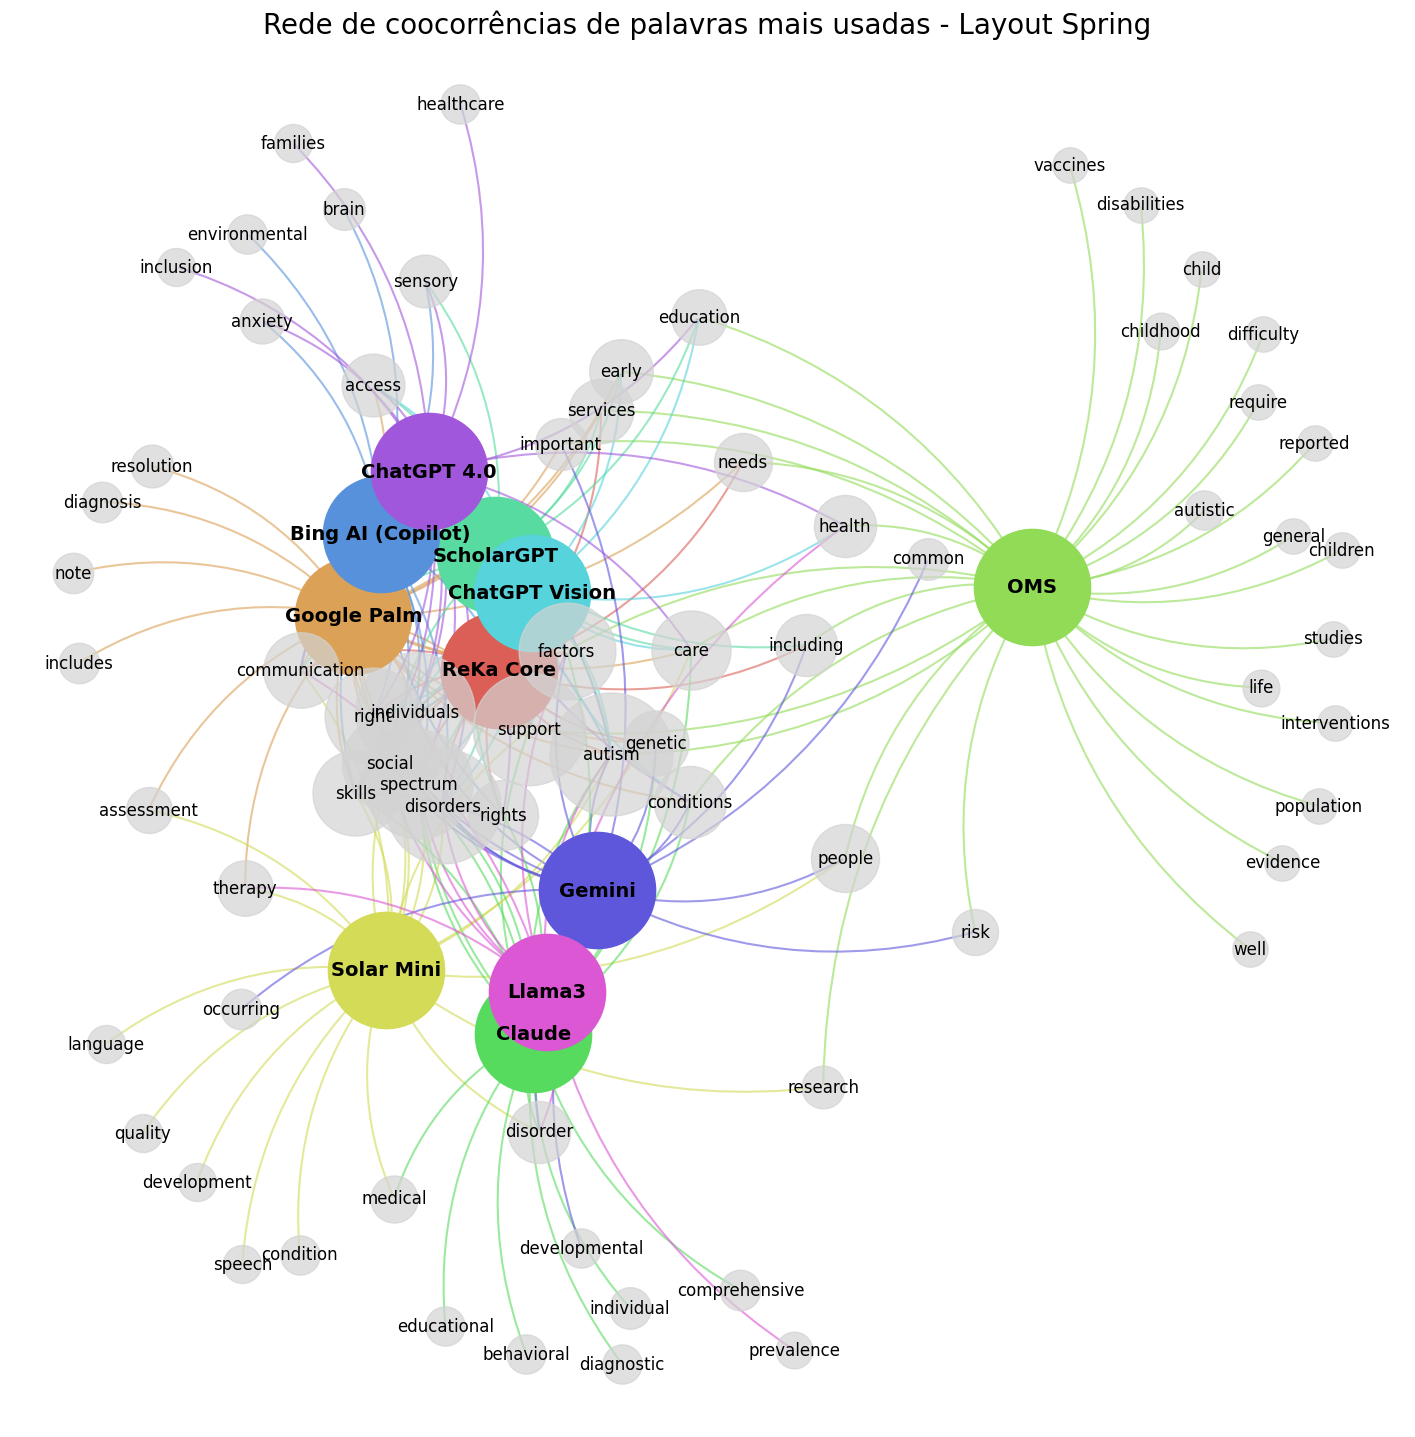

In [61]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib.patches import FancyArrowPatch
from matplotlib import colors as mcolors


df = pd.read_csv('autism-info-llm-comparison/top_words_per_network.csv')
df_filtered = df[df['n'] > 2]

G = nx.Graph()
for _, row in df_filtered.iterrows():
    G.add_edge(row['network'], row['word'], weight=row['n'])


networks = df['network'].unique()
word_freq = df_filtered.groupby('word')['n'].sum().to_dict()

# Obter paleta e remover tons de cinza
raw_palette = sns.color_palette("hls", n_colors=12)
palette = [color for color in raw_palette if not all(abs(c - 0.7) < 0.05 for c in color)]  # remove o cinza (~[0.7, 0.7, 0.7])

# Garantir que tenha cores suficientes
if len(palette) < len(networks):
    raise ValueError("Número de redes maior que as cores disponíveis sem o cinza!")

network_color_map = dict(zip(networks, palette))

node_colors = [network_color_map[node] if node in networks else 'lightgray' for node in G.nodes()]
node_sizes = [7000 if node in networks else 500 + word_freq.get(node, 1) * 50 for node in G.nodes()]

# Gerar layout inicial com kamada_kawai_layout
pos = nx.spring_layout(G, seed = 80)

# Calcular as distâncias dos nós ao centro
center = np.array([0.0, 0.0])  # Posição central
distances_to_center = {node: np.linalg.norm(np.array([x, y]) - center) for node, (x, y) in pos.items()}

# Ajustar posições para expandir o centro e compactar bordas
scale_factor = 1.8
adjusted_pos = {}
for node, (x, y) in pos.items():
    distance = distances_to_center[node]
    scale = (1 / (distance + 1)) * scale_factor
    adjusted_pos[node] = (x * scale, y * scale)

# Preparar as cores das arestas
edge_colors = []
for u, v in G.edges():
    if u in network_color_map:
        edge_colors.append(network_color_map[u])
    elif v in network_color_map:
        edge_colors.append(network_color_map[v])
    else:
        edge_colors.append("gray")

# Criar a figura principal
fig, ax = plt.subplots(figsize=(18, 18))

# Desenhar os nós
for i, node in enumerate(G.nodes()):
    if node in word_freq:  # Verifica se o nó é uma palavra
        alpha_value = 0.7  # 80% de transparência
    else:
        alpha_value = 1.0  # Sem transparência para as redes

    nx.draw_networkx_nodes(G, adjusted_pos, nodelist=[node], node_color=[network_color_map.get(node, 'lightgray')],
                           node_size=[node_sizes[i]], alpha=alpha_value, ax=ax)

# Arestas retas
# nx.draw_networkx_edges(G, adjusted_pos, edge_color=edge_colors, alpha=0.6, width=1.0, ax=ax)
# Desenhar arestas curvilíneas manualmente
for (u, v), color in zip(G.edges(), edge_colors):
    if u == v:
        continue  # ignorar laços (se houver)

    # Pegar posições
    x1, y1 = adjusted_pos[u]
    x2, y2 = adjusted_pos[v]

    # Criar uma curva de Bézier (curva quadrática)
    rad = 0.2  # fator de curvatura (pode ajustar)
    connectionstyle = f"arc3,rad={rad}"

    arrow = FancyArrowPatch(
        (x1, y1),
        (x2, y2),
        connectionstyle=connectionstyle,
        color=color,
        linewidth=1.5,
        alpha=0.6,
        arrowstyle='-',
        zorder=0  # para ficar atrás dos nós
    )
    ax.add_patch(arrow)

# Adicionar os textos
texts = []
for node, (x, y) in adjusted_pos.items():
    fontweight = 'bold' if node in networks else 'normal'
    fontsize = 14 if node in networks else 12
    texts.append(ax.text(x, y, node, fontsize=fontsize, ha='center', va='center', fontweight=fontweight))


ax.set_title("Rede de coocorrências de palavras mais usadas - Layout Spring", fontsize=20)
ax.axis('off')
plt.show()


In [52]:
!git clone https://github.com/gskumlehn/autism-info-llm-comparison.git

fatal: destination path 'autism-info-llm-comparison' already exists and is not an empty directory.


In [53]:
!pip install adjustText


In [54]:
import community  # python-louvain
partition = community.best_partition(G)
print(partition)

{'ReKa Core': 0, 'individuals': 0, 'support': 2, 'Google Palm': 0, 'Solar Mini': 3, 'autism': 3, 'spectrum': 3, 'OMS': 4, 'right': 0, 'Claude': 5, 'disorders': 3, 'ScholarGPT': 2, 'ChatGPT Vision': 2, 'factors': 0, 'social': 2, 'Bing AI (Copilot)': 2, 'Gemini': 1, 'people': 1, 'health': 4, 'skills': 1, 'genetic': 0, 'care': 4, 'rights': 5, 'early': 2, 'ChatGPT 4.0': 2, 'conditions': 5, 'disorder': 1, 'Llama3': 3, 'communication': 2, 'including': 0, 'needs': 0, 'services': 0, 'therapy': 3, 'important': 0, 'resolution': 0, 'brain': 2, 'access': 2, 'individual': 5, 'medical': 5, 'common': 1, 'risk': 1, 'sensory': 2, 'comprehensive': 5, 'occurring': 1, 'assessment': 0, 'diagnosis': 0, 'includes': 0, 'note': 0, 'education': 2, 'anxiety': 2, 'environmental': 2, 'healthcare': 2, 'behavioral': 5, 'diagnostic': 5, 'educational': 5, 'developmental': 1, 'autistic': 4, 'condition': 3, 'research': 3, 'families': 2, 'inclusion': 2, 'development': 3, 'language': 3, 'quality': 3, 'speech': 3, 'prevale

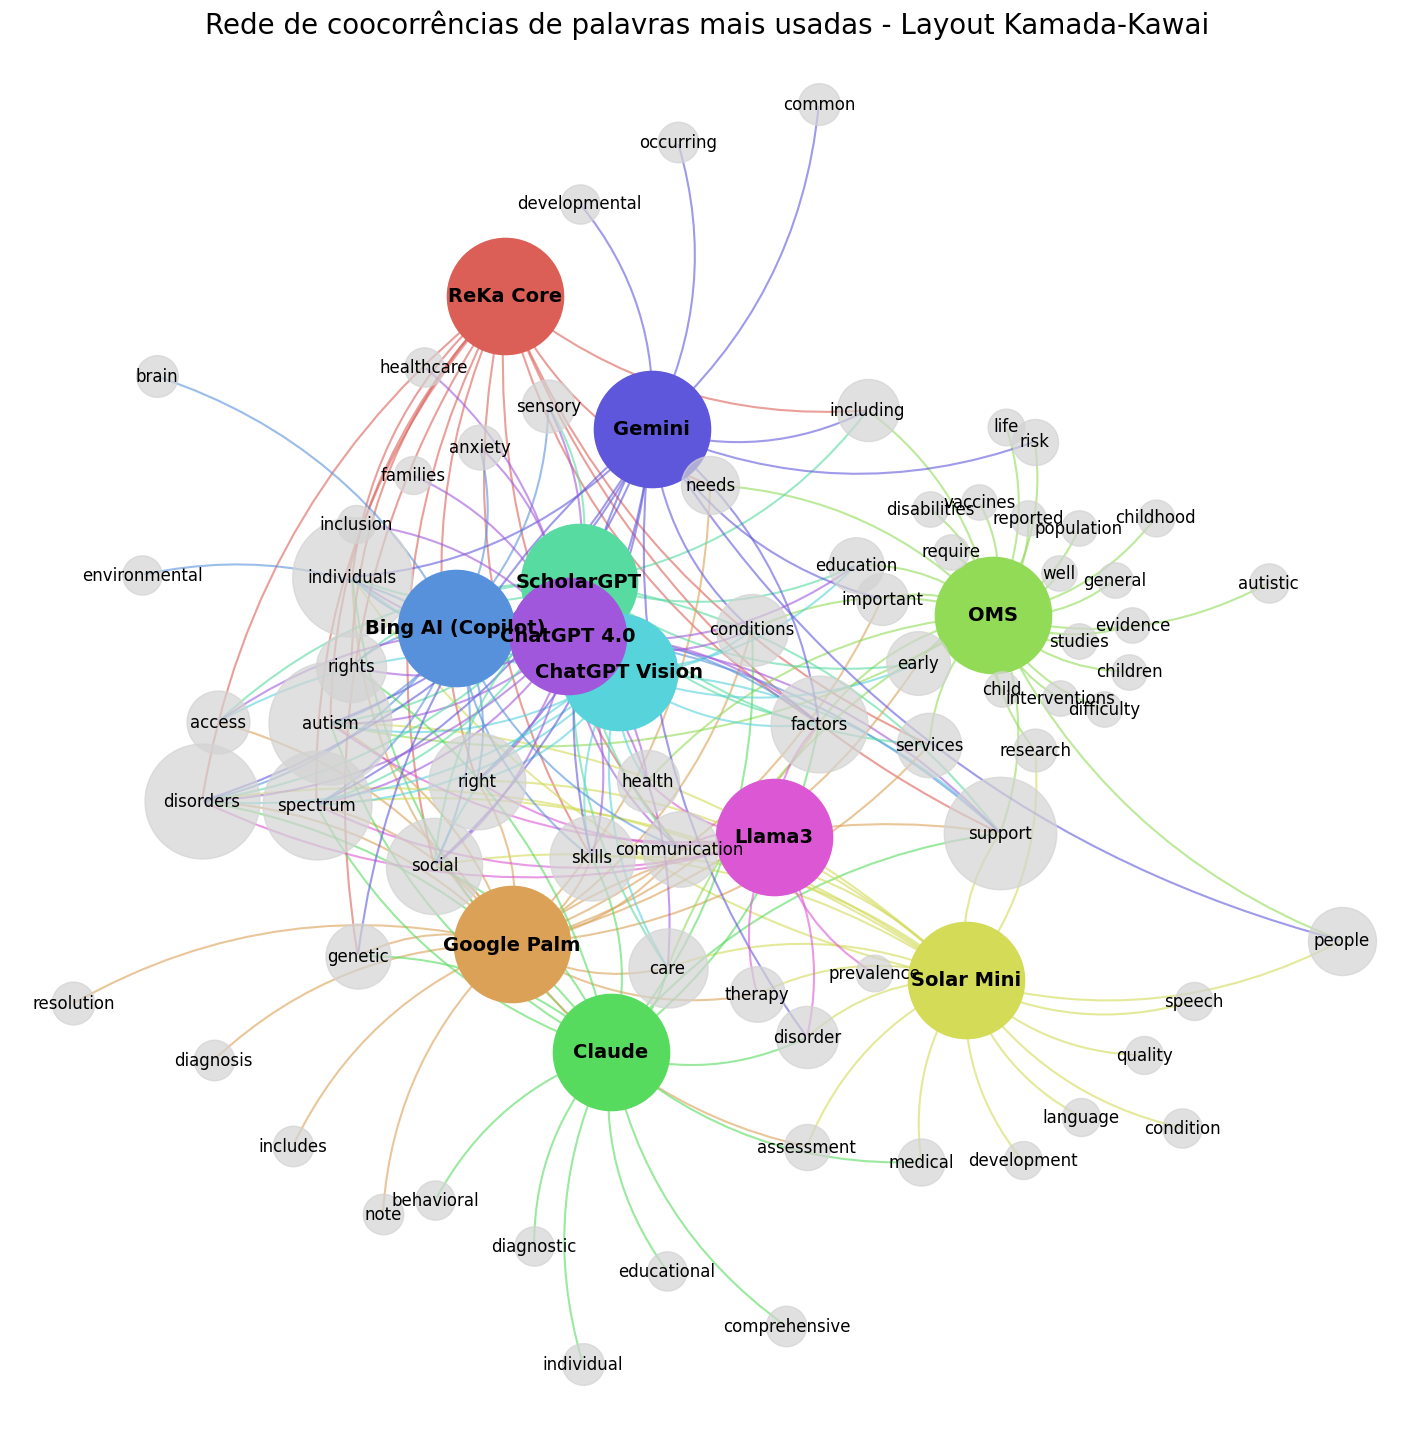

In [71]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib.patches import FancyArrowPatch
from matplotlib import colors as mcolors


# Função para rotacionar as posições
def rotate_positions(positions, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    cos_theta = np.cos(angle_radians)
    sin_theta = np.sin(angle_radians)
    rotation_matrix = np.array([[cos_theta, -sin_theta],
                                [sin_theta,  cos_theta]])
    return {
        node: tuple(rotation_matrix @ np.array(pos))
        for node, pos in positions.items()
    }


df = pd.read_csv('autism-info-llm-comparison/top_words_per_network.csv')
df_filtered = df[df['n'] > 2]

G = nx.Graph()
for _, row in df_filtered.iterrows():
    G.add_edge(row['network'], row['word'], weight=row['n'])


networks = df['network'].unique()
word_freq = df_filtered.groupby('word')['n'].sum().to_dict()

# Obter paleta e remover tons de cinza
raw_palette = sns.color_palette("hls", n_colors=12)
palette = [color for color in raw_palette if not all(abs(c - 0.7) < 0.05 for c in color)]  # remove o cinza (~[0.7, 0.7, 0.7])

# Garantir que tenha cores suficientes
if len(palette) < len(networks):
    raise ValueError("Número de redes maior que as cores disponíveis sem o cinza!")

network_color_map = dict(zip(networks, palette))

node_colors = [network_color_map[node] if node in networks else 'lightgray' for node in G.nodes()]
node_sizes = [7000 if node in networks else 500 + word_freq.get(node, 1) * 50 for node in G.nodes()]

# Gerar layout inicial com kamada_kawai_layout
pos = nx.kamada_kawai_layout(G, scale=0.2)

# Calcular as distâncias dos nós ao centro
center = np.array([0.0, 0.0])  # Posição central
distances_to_center = {node: np.linalg.norm(np.array([x, y]) - center) for node, (x, y) in pos.items()}

# Ajustar posições para expandir o centro e compactar bordas
scale_factor = 1.5
adjusted_pos = {}
for node, (x, y) in pos.items():
    distance = distances_to_center[node]
    scale = (1 / (distance + 1)) * scale_factor
    adjusted_pos[node] = (x * scale, y * scale)

# Aplicar rotação de 4 graus anti-horário
rotated_pos = rotate_positions(adjusted_pos, angle_degrees=40)

# Preparar as cores das arestas
edge_colors = []
for u, v in G.edges():
    if u in network_color_map:
        edge_colors.append(network_color_map[u])
    elif v in network_color_map:
        edge_colors.append(network_color_map[v])
    else:
        edge_colors.append("gray")

# Criar a figura principal
fig, ax = plt.subplots(figsize=(18, 18))

# Desenhar os nós
for i, node in enumerate(G.nodes()):
    if node in word_freq:  # Verifica se o nó é uma palavra
        alpha_value = 0.7  # 80% de transparência
    else:
        alpha_value = 1.0  # Sem transparência para as redes

    nx.draw_networkx_nodes(G, rotated_pos, nodelist=[node], node_color=[network_color_map.get(node, 'lightgray')],
                           node_size=[node_sizes[i]], alpha=alpha_value, ax=ax)

# Desenhar arestas curvilíneas manualmente
for (u, v), color in zip(G.edges(), edge_colors):
    if u == v:
        continue  # ignorar laços (se houver)

    # Pegar posições
    x1, y1 = rotated_pos[u]
    x2, y2 = rotated_pos[v]

    # Criar uma curva de Bézier (curva quadrática)
    rad = 0.2  # fator de curvatura (pode ajustar)
    connectionstyle = f"arc3,rad={rad}"

    arrow = FancyArrowPatch(
        (x1, y1),
        (x2, y2),
        connectionstyle=connectionstyle,
        color=color,
        linewidth=1.5,
        alpha=0.6,
        arrowstyle='-',
        zorder=0  # para ficar atrás dos nós
    )
    ax.add_patch(arrow)

# Adicionar os textos
texts = []
for node, (x, y) in rotated_pos.items():
    fontweight = 'bold' if node in networks else 'normal'
    fontsize = 14 if node in networks else 12
    texts.append(ax.text(x, y, node, fontsize=fontsize, ha='center', va='center', fontweight=fontweight))


ax.set_title("Rede de coocorrências de palavras mais usadas - Layout Kamada-Kawai", fontsize=20)
ax.axis('off')
plt.show()


In [56]:
import community  # python-louvain
partition = community.best_partition(G)
print(partition)

{'ReKa Core': 0, 'individuals': 0, 'support': 0, 'Google Palm': 1, 'Solar Mini': 5, 'autism': 5, 'spectrum': 5, 'OMS': 3, 'right': 1, 'Claude': 4, 'disorders': 5, 'ScholarGPT': 0, 'ChatGPT Vision': 0, 'factors': 1, 'social': 0, 'Bing AI (Copilot)': 5, 'Gemini': 2, 'people': 2, 'health': 3, 'skills': 0, 'genetic': 2, 'care': 3, 'rights': 4, 'early': 0, 'ChatGPT 4.0': 0, 'conditions': 4, 'disorder': 2, 'Llama3': 5, 'communication': 0, 'including': 0, 'needs': 0, 'services': 0, 'therapy': 1, 'important': 1, 'resolution': 1, 'brain': 5, 'access': 0, 'individual': 4, 'medical': 4, 'common': 2, 'risk': 2, 'sensory': 5, 'comprehensive': 4, 'occurring': 2, 'assessment': 1, 'diagnosis': 1, 'includes': 1, 'note': 1, 'education': 0, 'anxiety': 5, 'environmental': 5, 'healthcare': 0, 'behavioral': 4, 'diagnostic': 4, 'educational': 4, 'developmental': 2, 'autistic': 3, 'condition': 5, 'research': 5, 'families': 0, 'inclusion': 0, 'development': 5, 'language': 5, 'quality': 5, 'speech': 5, 'prevale

In [57]:
# Primeiro, criar um dicionário com as frequências das palavras da OMS
frequencias_oms = df[df['network'] == 'OMS'].set_index('word')['n'].to_dict()

# Função para contar quantas palavras coincidem com a OMS e têm frequência semelhante
def contar_palavras_similares(sub_df, tolerancia=5):
    count = 0
    for _, row in sub_df.iterrows():
        palavra = row['word']
        freq = row['n']
        if palavra in frequencias_oms:
            if abs(freq - frequencias_oms[palavra]) <= tolerancia:
                count += 1
    return count

# Aplicar por rede (excluindo OMS)
redes_df = df[df['network'] != 'OMS']
resultados_similares = redes_df.groupby('network').apply(contar_palavras_similares).reset_index()
resultados_similares.columns = ['network', 'quantidade_palavras_similares']

# Ordenar do maior para o menor
resultados_similares = resultados_similares.sort_values(by='quantidade_palavras_similares', ascending=False)
resultados_similares.head()


<ipython-input-57-86d2a902c9b9>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_similares = redes_df.groupby('network').apply(contar_palavras_similares).reset_index()


,network,quantidade_palavras_similares
6,Llama3,6
1,ChatGPT 4.0,5
8,ScholarGPT,5
2,ChatGPT Vision,5
4,Gemini,5


In [58]:
import pandas as pd

# Carregar o CSV
df = pd.read_csv('autism-info-llm-comparison/top_words_per_network.csv')

# Contar em quantos modelos cada palavra aparece
palavras_em_redes = df.groupby('word')['network'].nunique().reset_index()
palavras_em_redes.columns = ['word', 'usos']

# Filtrar palavras usadas por mais de um modelo
palavras_compartilhadas = palavras_em_redes[palavras_em_redes['usos'] > 1]

# Obter os top 3 modelos por frequência de cada palavra
top3 = (
    df.sort_values(by='n', ascending=False)
      .groupby('word')
      .head(3)  # pega os top 3 por frequência
)

# Criar DataFrame com lista dos top 3 modelos e soma das frequências
top_modelos_por_palavra = (
    top3.groupby('word')
        .agg(top_3_modelos=('network', list), freq_tot=('n', 'sum'))
        .reset_index()
)

# Juntar com o DataFrame de palavras compartilhadas
palavras_compartilhadas_top3 = palavras_compartilhadas.merge(top_modelos_por_palavra, on='word')

# Ordenar pela soma da frequência (decrescente)
palavras_compartilhadas_top3 = palavras_compartilhadas_top3.sort_values(by=['usos', 'freq_tot'], ascending=[False, False])

# Resultado final
print(palavras_compartilhadas_top3)
palavras_compartilhadas_top3.to_csv('palavras_compartilhadas_top3.csv', index=False)

             word  usos                                 top_3_modelos  \
3          autism    11          [Solar Mini, OMS, Bing AI (Copilot)]   
19    individuals    10          [ReKa Core, Google Palm, Solar Mini]   
35        support    10           [ReKa Core, Claude, ChatGPT Vision]   
9       disorders    10    [Solar Mini, Bing AI (Copilot), ReKa Core]   
33       spectrum    10    [Solar Mini, Bing AI (Copilot), ReKa Core]   
12        factors    10              [Google Palm, Gemini, ReKa Core]   
32         social    10        [ReKa Core, Claude, Bing AI (Copilot)]   
31         skills     9              [ReKa Core, Gemini, Google Palm]   
26          right     8              [Google Palm, ReKa Core, Gemini]   
5            care     8            [OMS, ChatGPT Vision, ChatGPT 4.0]   
6   communication     7    [ReKa Core, ScholarGPT, Bing AI (Copilot)]   
7      conditions     7                 [Claude, Gemini, Google Palm]   
27         rights     5               [ReKa Core, C

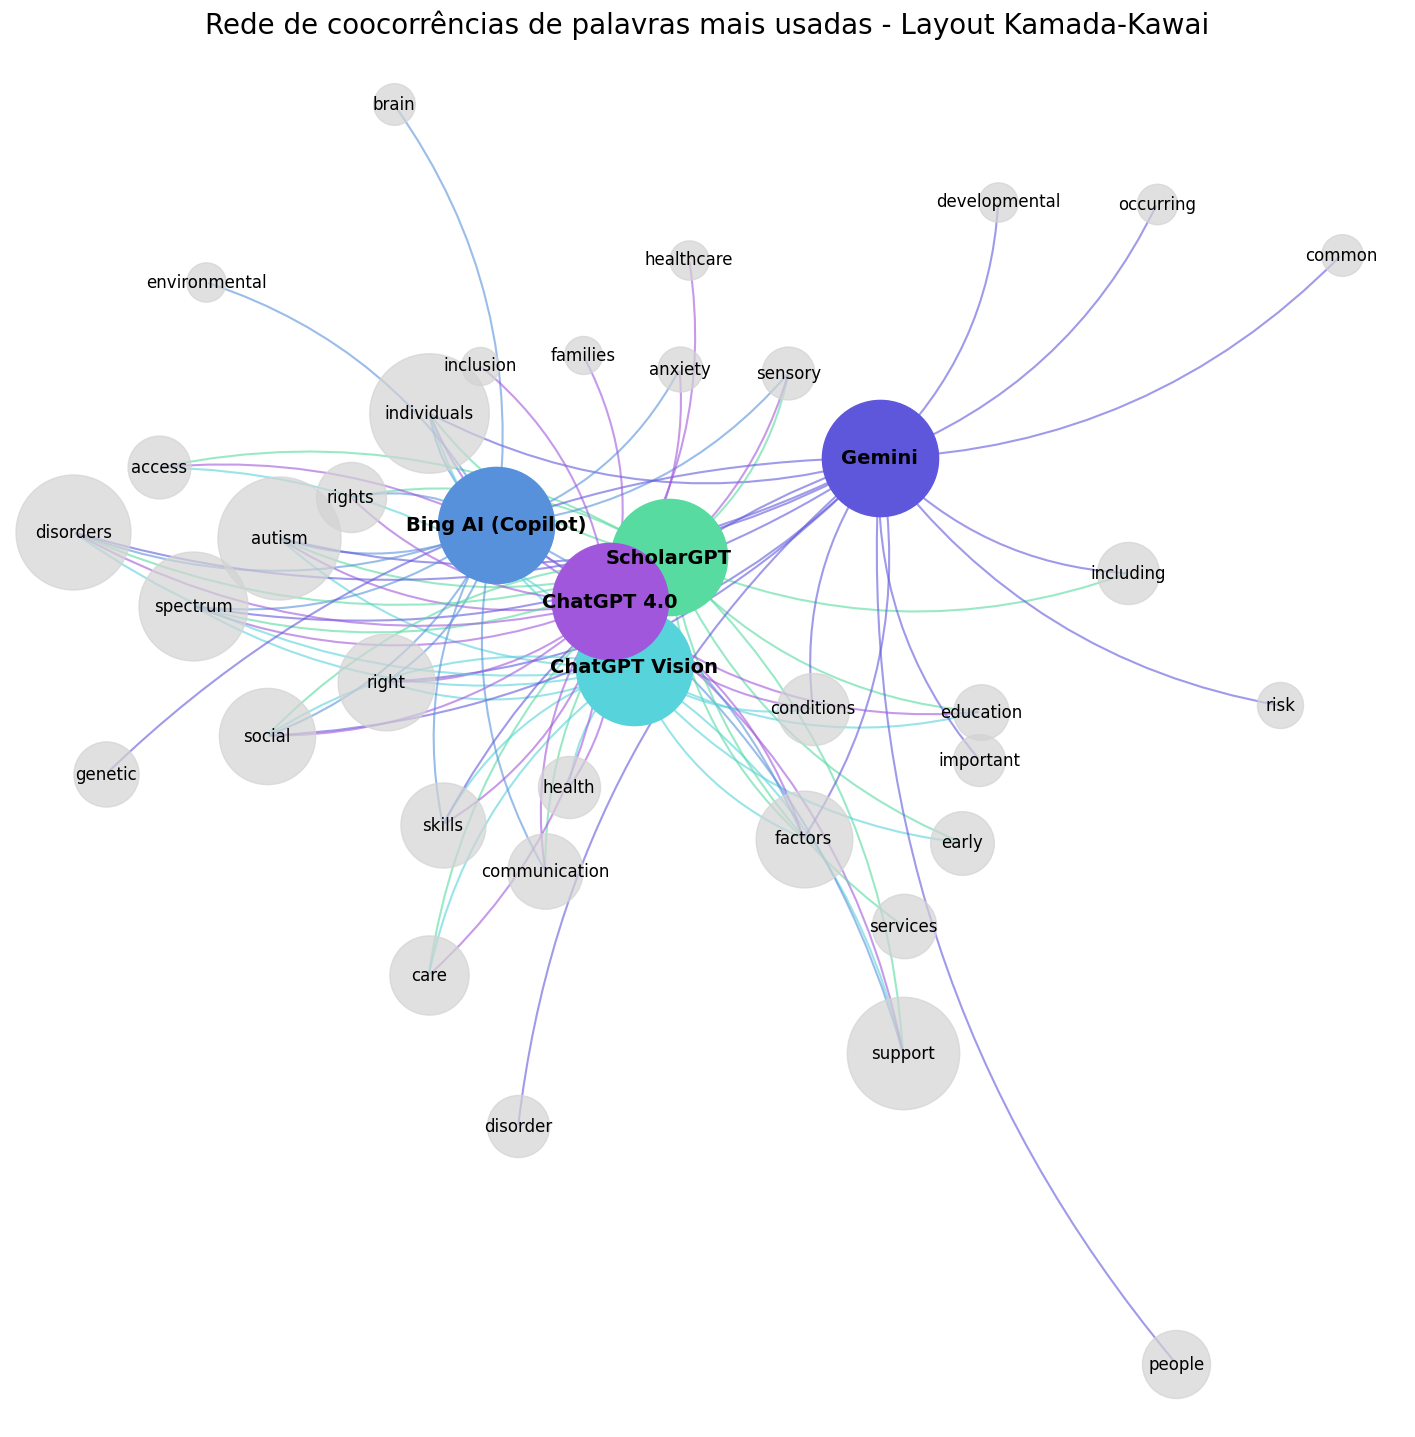

In [65]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import FancyArrowPatch

# Função para rotacionar as posições
def rotate_positions(positions, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    cos_theta = np.cos(angle_radians)
    sin_theta = np.sin(angle_radians)
    rotation_matrix = np.array([[cos_theta, -sin_theta],
                                [sin_theta,  cos_theta]])
    return {
        node: tuple(rotation_matrix @ np.array(pos))
        for node, pos in positions.items()
    }

# Carregar e filtrar dados
df = pd.read_csv('autism-info-llm-comparison/top_words_per_network.csv')
df_filtered = df[df['n'] > 2]

# Criar grafo
G = nx.Graph()
for _, row in df_filtered.iterrows():
    G.add_edge(row['network'], row['word'], weight=row['n'])

networks = df['network'].unique()
word_freq = df_filtered.groupby('word')['n'].sum().to_dict()

# Especifique aqui as networks que devem aparecer coloridas no grafo
visible_networks = ["ChatGPT 4.0", "ChatGPT Vision","ScholarGPT","Bing AI (Copilot)", "Gemini"]  # << edite essa lista conforme necessário

# Determinar palavras conectadas às networks visíveis
visible_words = set()
for u, v in G.edges():
    if u in visible_networks:
        visible_words.add(v)
    elif v in visible_networks:
        visible_words.add(u)
visible_nodes = set(visible_networks) | visible_words

# Paleta de cores, sem tons de cinza
raw_palette = sns.color_palette("hls", n_colors=12)
palette = [color for color in raw_palette if not all(abs(c - 0.7) < 0.05 for c in color)]
network_color_map = dict(zip(networks, palette))

# Tamanhos e cores dos nós
node_colors = [network_color_map[node] if node in visible_networks else 'lightgray' for node in G.nodes()]
node_sizes = [7000 if node in visible_networks else 500 + word_freq.get(node, 1) * 50 for node in G.nodes()]

# Layout e ajuste de posições
pos = nx.kamada_kawai_layout(G, scale=0.2)
center = np.array([0.0, 0.0])
distances_to_center = {node: np.linalg.norm(np.array([x, y]) - center) for node, (x, y) in pos.items()}
scale_factor = 1.5
adjusted_pos = {node: (x * (1 / (dist + 1)) * scale_factor, y * (1 / (dist + 1)) * scale_factor)
                for node, (x, y), dist in zip(pos.keys(), pos.values(), distances_to_center.values())}
rotated_pos = rotate_positions(adjusted_pos, angle_degrees=4)

# Cores das arestas
edge_colors = []
for u, v in G.edges():
    if u in network_color_map:
        edge_colors.append(network_color_map[u])
    elif v in network_color_map:
        edge_colors.append(network_color_map[v])
    else:
        edge_colors.append("gray")

# Criar figura
fig, ax = plt.subplots(figsize=(18, 18))

# Desenhar nós visíveis
for i, node in enumerate(G.nodes()):
    if node not in visible_nodes:
        continue
    alpha_value = 0.7 if node in word_freq else 1.0
    nx.draw_networkx_nodes(G, rotated_pos, nodelist=[node],
                           node_color=[network_color_map.get(node, 'lightgray')],
                           node_size=[node_sizes[i]], alpha=alpha_value, ax=ax)

# Desenhar arestas visíveis
for (u, v), color in zip(G.edges(), edge_colors):
    if u not in visible_nodes or v not in visible_nodes:
        continue
    x1, y1 = rotated_pos[u]
    x2, y2 = rotated_pos[v]
    arrow = FancyArrowPatch((x1, y1), (x2, y2),
                            connectionstyle="arc3,rad=0.2",
                            color=color, linewidth=1.5,
                            alpha=0.6, arrowstyle='-', zorder=0)
    ax.add_patch(arrow)

# Adicionar textos visíveis
for node, (x, y) in rotated_pos.items():
    if node not in visible_nodes:
        continue
    fontweight = 'bold' if node in networks else 'normal'
    fontsize = 14 if node in networks else 12
    ax.text(x, y, node, fontsize=fontsize, ha='center', va='center', fontweight=fontweight)

ax.set_title("Rede de coocorrências de palavras mais usadas - Layout Kamada-Kawai", fontsize=20)
ax.axis('off')
plt.show()


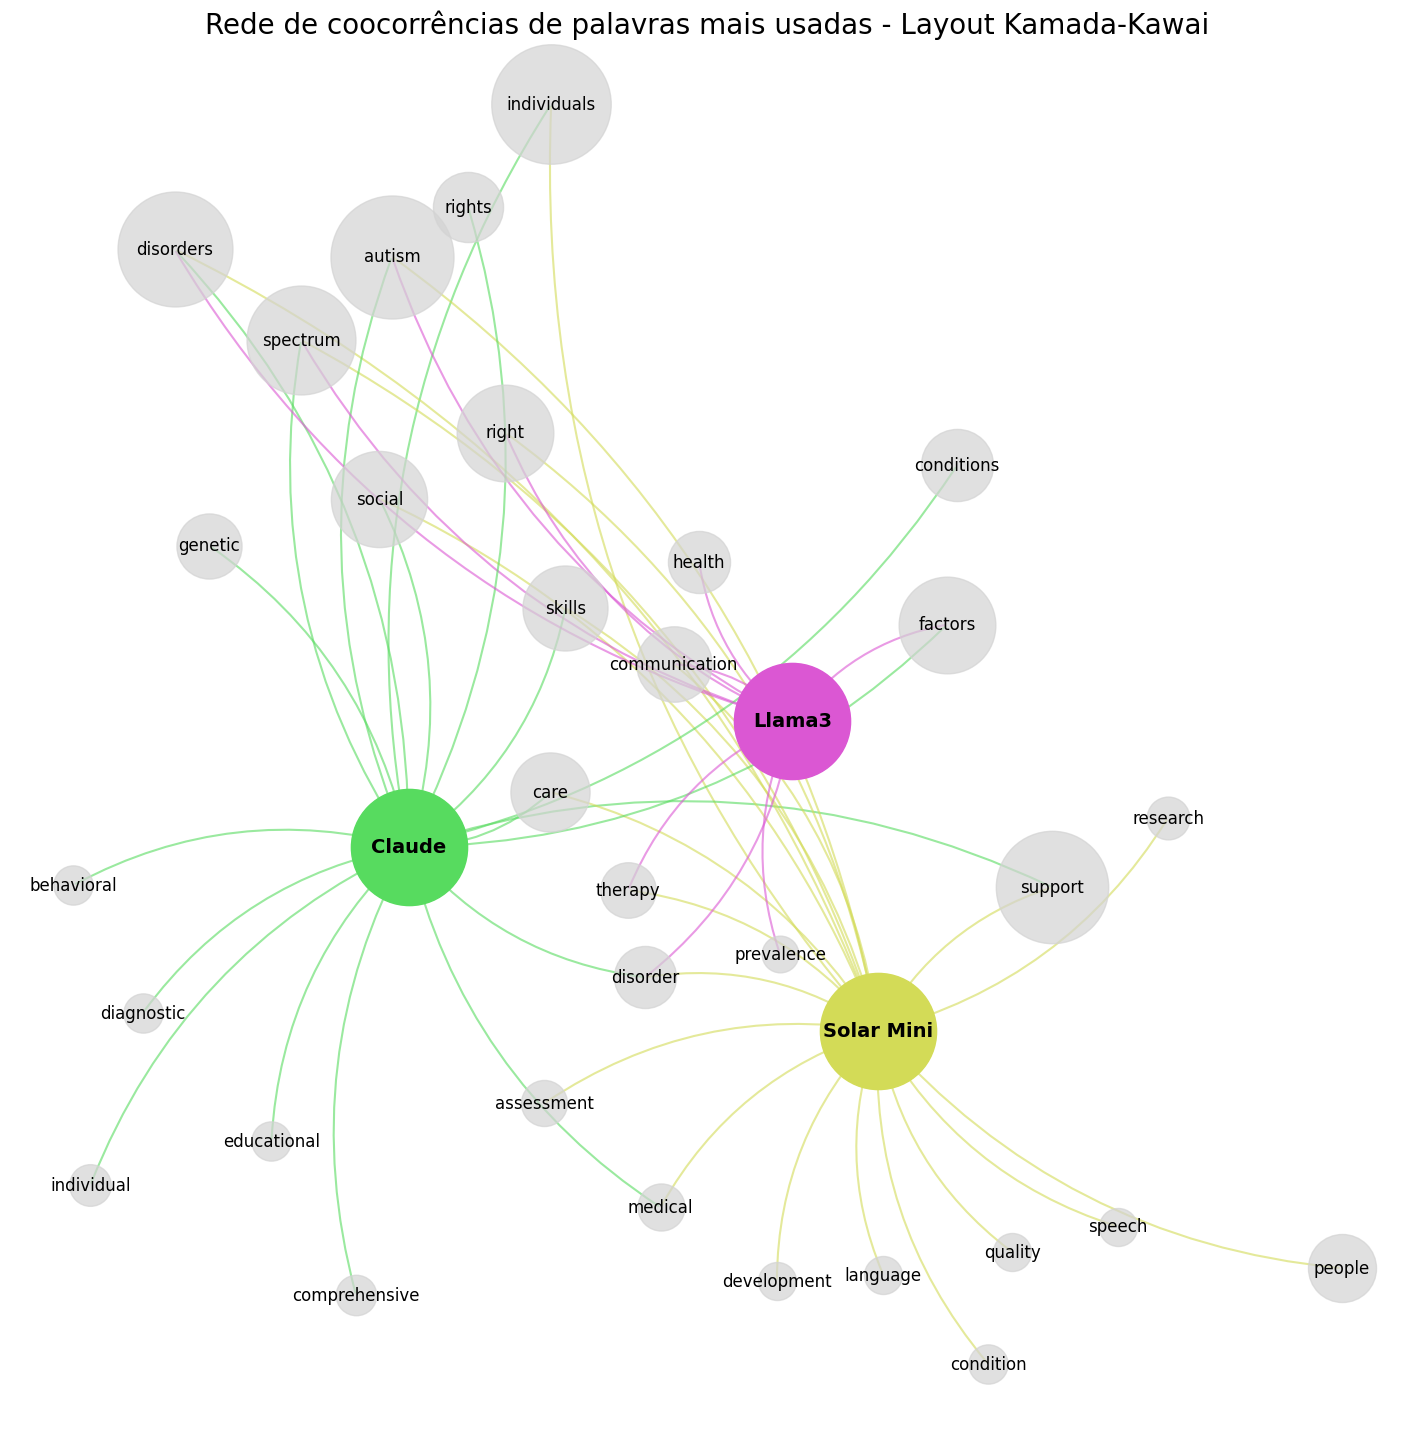

In [66]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import FancyArrowPatch

# Função para rotacionar as posições
def rotate_positions(positions, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    cos_theta = np.cos(angle_radians)
    sin_theta = np.sin(angle_radians)
    rotation_matrix = np.array([[cos_theta, -sin_theta],
                                [sin_theta,  cos_theta]])
    return {
        node: tuple(rotation_matrix @ np.array(pos))
        for node, pos in positions.items()
    }

# Carregar e filtrar dados
df = pd.read_csv('autism-info-llm-comparison/top_words_per_network.csv')
df_filtered = df[df['n'] > 2]

# Criar grafo
G = nx.Graph()
for _, row in df_filtered.iterrows():
    G.add_edge(row['network'], row['word'], weight=row['n'])

networks = df['network'].unique()
word_freq = df_filtered.groupby('word')['n'].sum().to_dict()

# Especifique aqui as networks que devem aparecer coloridas no grafo
visible_networks = ["Llama3", "Solar Mini","Claude", "ReKa Core	"]  # << edite essa lista conforme necessário

# Determinar palavras conectadas às networks visíveis
visible_words = set()
for u, v in G.edges():
    if u in visible_networks:
        visible_words.add(v)
    elif v in visible_networks:
        visible_words.add(u)
visible_nodes = set(visible_networks) | visible_words

# Paleta de cores, sem tons de cinza
raw_palette = sns.color_palette("hls", n_colors=12)
palette = [color for color in raw_palette if not all(abs(c - 0.7) < 0.05 for c in color)]
network_color_map = dict(zip(networks, palette))

# Tamanhos e cores dos nós
node_colors = [network_color_map[node] if node in visible_networks else 'lightgray' for node in G.nodes()]
node_sizes = [7000 if node in visible_networks else 500 + word_freq.get(node, 1) * 50 for node in G.nodes()]

# Layout e ajuste de posições
pos = nx.kamada_kawai_layout(G, scale=0.2)
center = np.array([0.0, 0.0])
distances_to_center = {node: np.linalg.norm(np.array([x, y]) - center) for node, (x, y) in pos.items()}
scale_factor = 1.5
adjusted_pos = {node: (x * (1 / (dist + 1)) * scale_factor, y * (1 / (dist + 1)) * scale_factor)
                for node, (x, y), dist in zip(pos.keys(), pos.values(), distances_to_center.values())}
rotated_pos = rotate_positions(adjusted_pos, angle_degrees=4)

# Cores das arestas
edge_colors = []
for u, v in G.edges():
    if u in network_color_map:
        edge_colors.append(network_color_map[u])
    elif v in network_color_map:
        edge_colors.append(network_color_map[v])
    else:
        edge_colors.append("gray")

# Criar figura
fig, ax = plt.subplots(figsize=(18, 18))

# Desenhar nós visíveis
for i, node in enumerate(G.nodes()):
    if node not in visible_nodes:
        continue
    alpha_value = 0.7 if node in word_freq else 1.0
    nx.draw_networkx_nodes(G, rotated_pos, nodelist=[node],
                           node_color=[network_color_map.get(node, 'lightgray')],
                           node_size=[node_sizes[i]], alpha=alpha_value, ax=ax)

# Desenhar arestas visíveis
for (u, v), color in zip(G.edges(), edge_colors):
    if u not in visible_nodes or v not in visible_nodes:
        continue
    x1, y1 = rotated_pos[u]
    x2, y2 = rotated_pos[v]
    arrow = FancyArrowPatch((x1, y1), (x2, y2),
                            connectionstyle="arc3,rad=0.2",
                            color=color, linewidth=1.5,
                            alpha=0.6, arrowstyle='-', zorder=0)
    ax.add_patch(arrow)

# Adicionar textos visíveis
for node, (x, y) in rotated_pos.items():
    if node not in visible_nodes:
        continue
    fontweight = 'bold' if node in networks else 'normal'
    fontsize = 14 if node in networks else 12
    ax.text(x, y, node, fontsize=fontsize, ha='center', va='center', fontweight=fontweight)

ax.set_title("Rede de coocorrências de palavras mais usadas - Layout Kamada-Kawai", fontsize=20)
ax.axis('off')
plt.show()
